# Question 2 -plantation planners 

by Mazhar Javed Awan 

## 1. Lets import all the libraries 

In [1]:
# Import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import RFE # Recursive Feature Elimination
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import warnings
import time
import datetime
import pickle

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import missingno as msno
import scipy.stats as st
from xgboost import XGBRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestRegressor

## 2. Read the dataset and explore the statistics

In [3]:
data = pd.read_csv('palm_ffb.csv')

In [4]:
data.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [5]:
data.tail()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
125,01.06.2018,498.2,27.213333,21.6,33.6,165.6,24,820758.9147,1.29
126,01.07.2018,494.7,27.074194,21.2,33.5,154.7,26,882254.2254,1.42
127,01.08.2018,478.8,27.016129,20.4,33.6,127.2,25,829488.8199,1.61
128,01.09.2018,481.1,26.946667,21.0,34.2,180.6,23,792101.0471,1.91
129,01.10.2018,510.8,26.819355,21.0,34.4,207.0,26,771805.3922,2.04


# Exploratory Data Analysis (EDA)

# Need to get a better understanding of the given data. Questions like: 

# How much data do we have? Are there are any missing values? 
# What is the data type of each column?
# What is the distribution of data in each column? Do we see any outliers?

In [6]:
# Create a function to display information about the data
pd.set_option('display.max_columns', 50)
def display_data_info(data):

  # 1. Print the number of rows and the columns in the data
  print("#################################################### SHAPE OF DATA ##############################################################################")
  rows = data.shape[0]
  columns = data.shape[1]
  print()
  print("Number of rows in the data are {:,}".format(rows))
  print("Number of columns in the data are {:,}".format(columns))
  print()

  # 2. Print the number of null values in the data and the percentage of null values
  print("#################################################### FEATURES WITH NULL VALUES ##############################################################################")
  print()
  for col in data.columns:
    # Calculate the number of null values
    null_values = data[col].isnull().sum()

    # If the null values > 0 print the column, number of null values and the percentage of null values
    if null_values > 0:
      perc_null_vals = float(null_values)*100/rows
      print("FEATURE: {}".format(col))
      print("NULL VALUES COUNT: {}".format(null_values))
      print("PERCENTAGE VALUES COUNT: {:.3f}%".format(perc_null_vals))
      print()
  
  # 3. Describe the data
  print("#################################################### DESCRIPTIVE STATISTICS ##############################################################################")
  print()
  print(data.describe())
  print()

  # 4. Print the data info
  print("#################################################### DATA INFROMATION ##############################################################################")
  print()
  print(data.info())

In [7]:
# Call the above function
display_data_info(data)

#################################################### SHAPE OF DATA ##############################################################################

Number of rows in the data are 130
Number of columns in the data are 9

#################################################### FEATURES WITH NULL VALUES ##############################################################################

#################################################### DESCRIPTIVE STATISTICS ##############################################################################

       SoilMoisture  Average_Temp    Min_Temp    Max_Temp  Precipitation  \
count    130.000000    130.000000  130.000000  130.000000     130.000000   
mean     527.646923     26.849918   21.379231   33.851538     188.980769   
std       57.367844      0.651413    0.688971    1.079638      80.237210   
min      380.700000     25.158065   18.900000   31.100000       2.000000   
25%      488.625000     26.442285   21.000000   33.100000     140.300000   
50%      5

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SoilMoisture,130.0,527.646923,57.367844,380.700000,488.625000,538.300000,571.025000,647.3000
Average_Temp,130.0,26.849918,0.651413,25.158065,26.442285,26.930645,27.270726,28.5800
Min_Temp,130.0,21.379231,0.688971,18.900000,21.000000,21.500000,21.800000,22.6000
Max_Temp,130.0,33.851538,1.079638,31.100000,33.100000,33.900000,34.600000,36.0000
Precipitation,130.0,188.980769,80.237210,2.000000,140.300000,182.150000,226.100000,496.1000
Working_days,130.0,24.753846,1.239289,21.000000,24.000000,25.000000,26.000000,27.0000
HA_Harvested,130.0,793404.491565,34440.893854,683431.944400,768966.949100,790036.158050,821989.235250,882254.2254
FFB_Yield,130.0,1.602231,0.281751,1.080000,1.390000,1.585000,1.807500,2.2700


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           130 non-null    object 
 1   SoilMoisture   130 non-null    float64
 2   Average_Temp   130 non-null    float64
 3   Min_Temp       130 non-null    float64
 4   Max_Temp       130 non-null    float64
 5   Precipitation  130 non-null    float64
 6   Working_days   130 non-null    int64  
 7   HA_Harvested   130 non-null    float64
 8   FFB_Yield      130 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.3+ KB


In [10]:
data.isnull().any()

Date             False
SoilMoisture     False
Average_Temp     False
Min_Temp         False
Max_Temp         False
Precipitation    False
Working_days     False
HA_Harvested     False
FFB_Yield        False
dtype: bool

<AxesSubplot:>

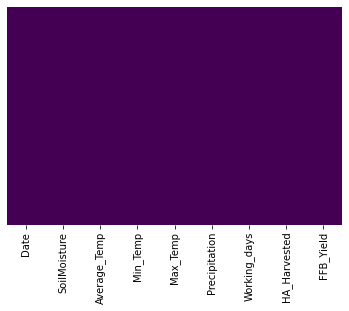

In [11]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

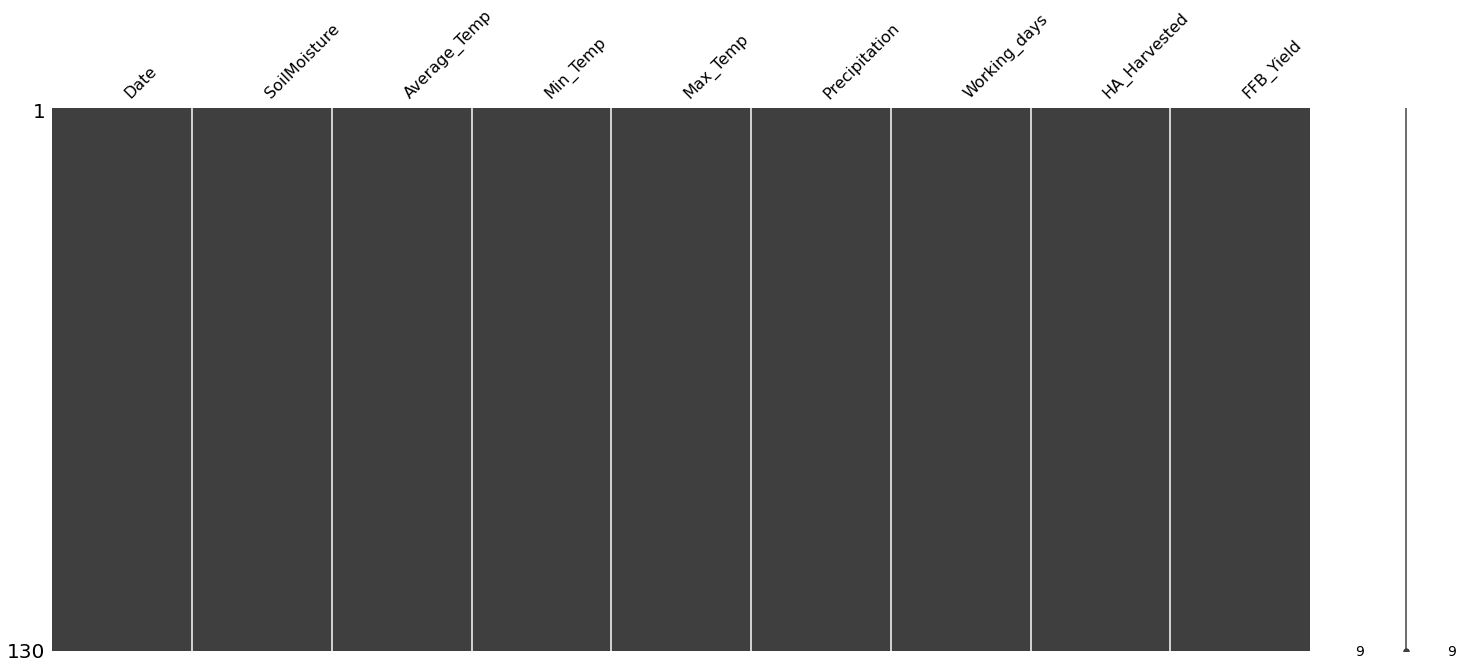

In [12]:
msno.matrix(data)

In [15]:
d_skew = data.skew() 
d_kurt = data.kurt()

frame = { 'Skewness': d_skew, 'Kurtosis': d_kurt } 
  
df_skew_kurt = pd.DataFrame(frame)

In [16]:
df_skew_kurt

,Skewness,Kurtosis
SoilMoisture,-0.394336,-0.262867
Average_Temp,-0.340606,0.141138
Min_Temp,-1.121358,2.000500
Max_Temp,-0.215635,-0.591251
Precipitation,0.526227,1.206761
Working_days,-0.660814,0.565301
HA_Harvested,-0.064445,0.085981
FFB_Yield,0.188629,-0.670960


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Skewness', ylabel='Density'>

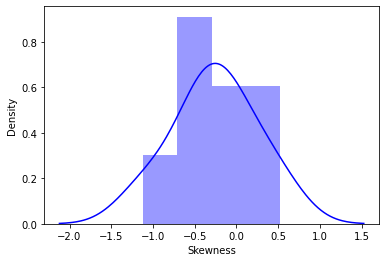

In [17]:
sns.distplot(data.skew(),color='blue',axlabel ='Skewness')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


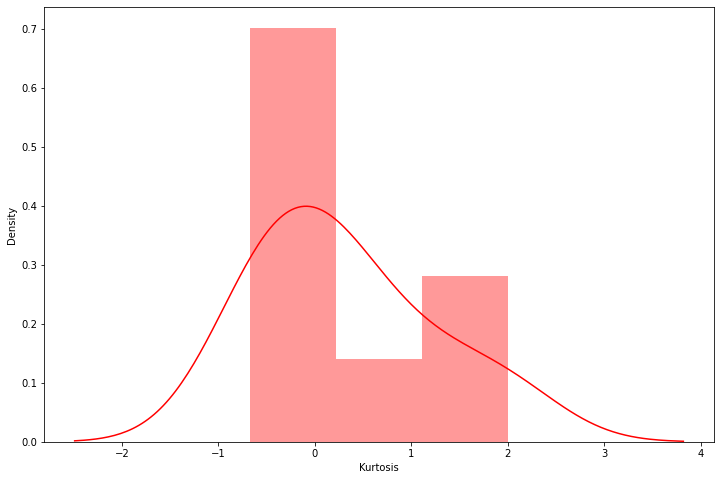

In [18]:
plt.figure(figsize = (12,8))
sns.distplot(data.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)
plt.show()

# Analysis 
- Data contains all numerical columns
- No missing Values
- No issues of Variance
- No issues of skewness and kurtosis

## 3. Lets explore the distributions further


Number of numerical variables:  8


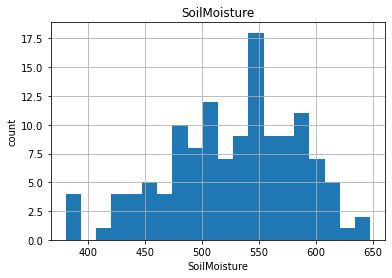

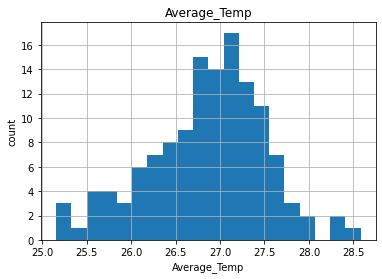

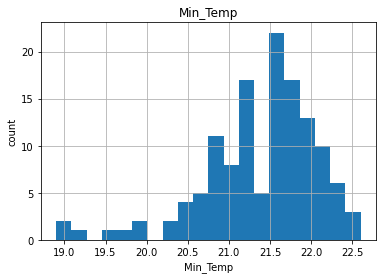

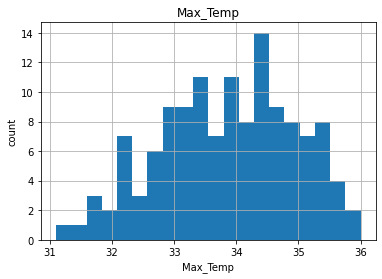

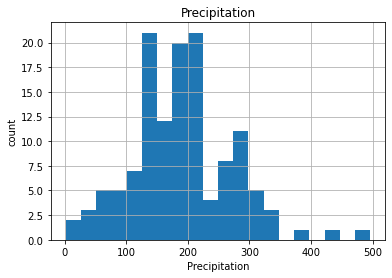

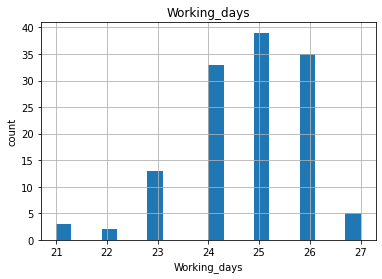

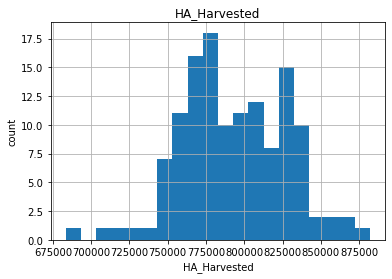

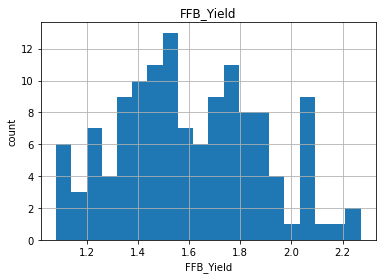

In [20]:
# list of numerical variables
num_vars = [var for var in data.columns if data[var].dtypes != 'O']

print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
data[num_vars].head()

# Let's go ahead and analyse the distributions of these variables
def analyse_continous(df, var):
    df = df.copy()
    df[var].hist(bins=20)
    plt.ylabel('count')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in num_vars:
    analyse_continous(data, var)

# Analysis
- min_temp is slightly skewed to the left(negatively skewed)


## 4. Lets explore the only discrete variable we have called Working_days


In [21]:
#  list of discrete variables
discrete_vars = [var for var in num_vars if len(data[var].unique())<20]

print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  1


In [22]:
# let's visualise the discrete variables
data[discrete_vars].head()

,Working_days
0,25
1,23
2,25
3,25
4,25


In [23]:
data[discrete_vars].describe()

,Working_days
count,130.000000
mean,24.753846
std,1.239289
min,21.000000
25%,24.000000
50%,25.000000
75%,26.000000
max,27.000000


In [24]:
#Types of hotel in the dataset
data['Working_days'].value_counts()

25    39
26    35
24    33
23    13
27     5
21     3
22     2
Name: Working_days, dtype: int64

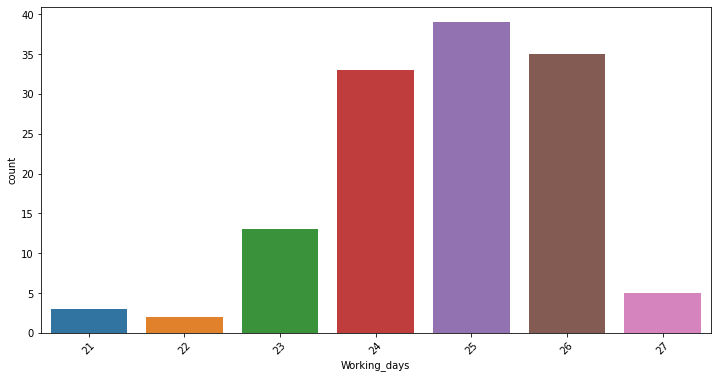

In [25]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Working_days', data = data)
xt = plt.xticks(rotation=45)

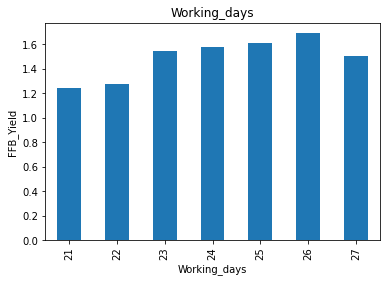

In [26]:
def analyse_discrete(df, var):
    df = df.copy()
    df.groupby(var)['FFB_Yield'].median().plot.bar()
    plt.title(var)
    plt.ylabel('FFB_Yield')
    plt.show()
    
for var in discrete_vars:
    analyse_discrete(data, var)

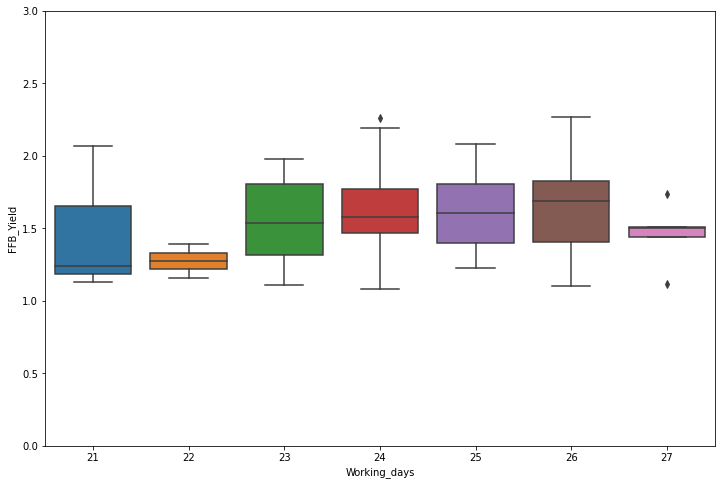

In [27]:
var = 'Working_days'
data_working_days = pd.concat([data['FFB_Yield'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="FFB_Yield", data=data_working_days)
fig.axis(ymin=0, ymax=3);

### We see that there is a relationship between the variable numbers and the FFB_Yield, but this relationship is not always monotonic. 

### For example, for Workinf_days, it seems there is a monotonic relationship: the higher the workind days, the higher the FFB Yield. It is clear that with more working days, the median yield increases except for the higest days(27). Also the maximum yield is generated when working days are equal to 26.

In [28]:
data.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [29]:

# list of continuous variables
cont_vars = [var for var in num_vars if var not in discrete_vars]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  7


In [30]:
# let's visualise the continuous variables
data[cont_vars].head()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,HA_Harvested,FFB_Yield
0,616.4,25.306452,21.3,32.2,184.4,777778.3951,1.62
1,568.9,26.165517,20.9,35.1,140.2,767988.2759,1.45
2,577.6,25.448387,21.3,32.9,280.4,783951.9231,1.56
3,581.1,26.903333,20.6,34.8,173.3,788987.0504,1.39
4,545.4,27.241935,20.9,35.0,140.6,813659.7222,1.44


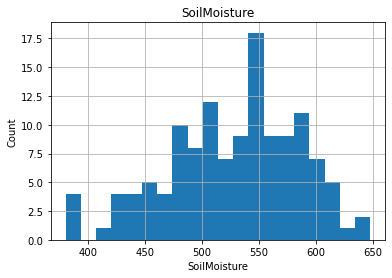

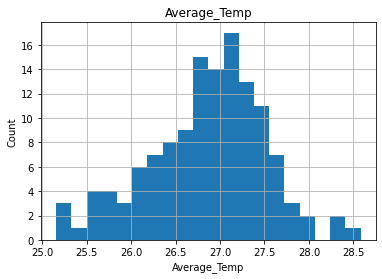

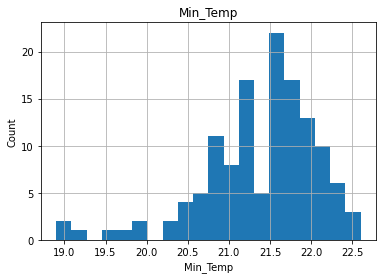

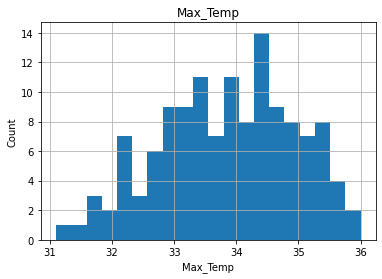

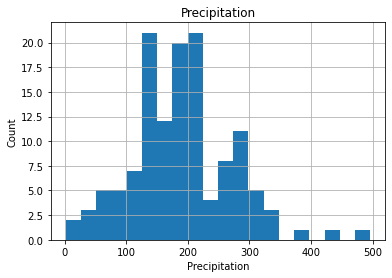

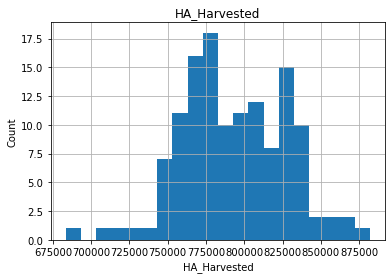

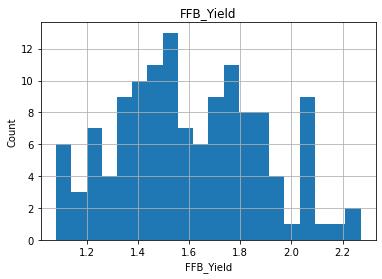

In [31]:
# Let's go ahead and analyse the distributions of these variables
def analyse_continous(df, var):
    df = df.copy()
    df[var].hist(bins=20)
    plt.ylabel('Count')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in cont_vars:
    analyse_continous(data, var)

## 5. Try to make the distribution normal - Log time


In [ ]:
# Let's go ahead and analyse the distributions of these variables
def analyse_transformed_continous(df, var):
    df = df.copy()
    
    # log does not take negative values, so let's be careful and skip those variables
    if 0 in data[var].unique():
        pass
    else:
        # log transform the variable
        df[var] = np.log(df[var])
        df[var].hist(bins=20)
        plt.ylabel('FFB Yield')
        plt.xlabel(var)
        plt.title(var)
        plt.show()
    
for var in cont_vars:
    analyse_transformed_continous(data, var)

# Analysis:
- It seems taking log of skewd variables only makes the distribution worse. we shall stick to the original data. 

## 6. Explore relationships between the FFB Yield and other features - Scatter/Pair Plots.


In [ ]:
# let's explore the relationship between the FFB Yield and the transformed variables
# with more detail
def non_transform_analyse_continous(df, var):
    df = df.copy()
    df['FFB_Yield'] = np.log(df['FFB_Yield'])
    plt.scatter(df[var], df['FFB_Yield'])
    plt.ylabel('FFB_Yield')
    plt.xlabel(var)
    plt.show()

for var in cont_vars:
    if var !='FFB_Yield':
        non_transform_analyse_continous(data, var)

# Analysis

- A clear linear relationship can be observed between FFB Yield and Precipitation feature. As one increases so does the other! Friendship goals!

## 7. Look for correlations among the features and also with the FFB_Yield, our target variable. 


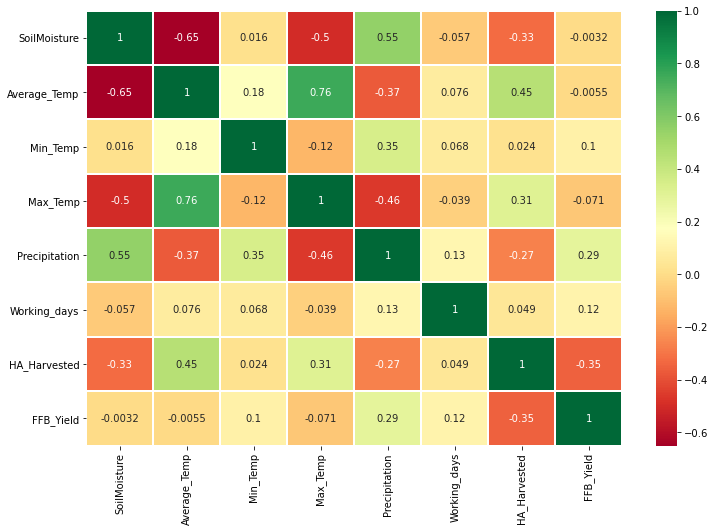

In [33]:
#Using Pearson Correlation
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=1) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

In [34]:
data.corr()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
SoilMoisture,1.000000,-0.649878,0.015839,-0.499936,0.552001,-0.057015,-0.326539,-0.003183
Average_Temp,-0.649878,1.000000,0.180396,0.761083,-0.369386,0.076321,0.446515,-0.005494
Min_Temp,0.015839,0.180396,1.000000,-0.124754,0.345944,0.068414,0.024396,0.103830
Max_Temp,-0.499936,0.761083,-0.124754,1.000000,-0.461117,-0.039112,0.314827,-0.071201
Precipitation,0.552001,-0.369386,0.345944,-0.461117,1.000000,0.127897,-0.265866,0.289604
Working_days,-0.057015,0.076321,0.068414,-0.039112,0.127897,1.000000,0.048876,0.116364
HA_Harvested,-0.326539,0.446515,0.024396,0.314827,-0.265866,0.048876,1.000000,-0.350222
FFB_Yield,-0.003183,-0.005494,0.103830,-0.071201,0.289604,0.116364,-0.350222,1.000000


In [35]:
#Correlation with output variable
cor_target = abs(data.corr()["FFB_Yield"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

Min_Temp         0.103830
Precipitation    0.289604
Working_days     0.116364
HA_Harvested     0.350222
FFB_Yield        1.000000
Name: FFB_Yield, dtype: float64

In [36]:
# correlation = data[num_vars].corr()
# print(abs(correlation['FFB_Yield'].sort_values(ascending = True)),'\n')

In [37]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='right', va='baseline', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

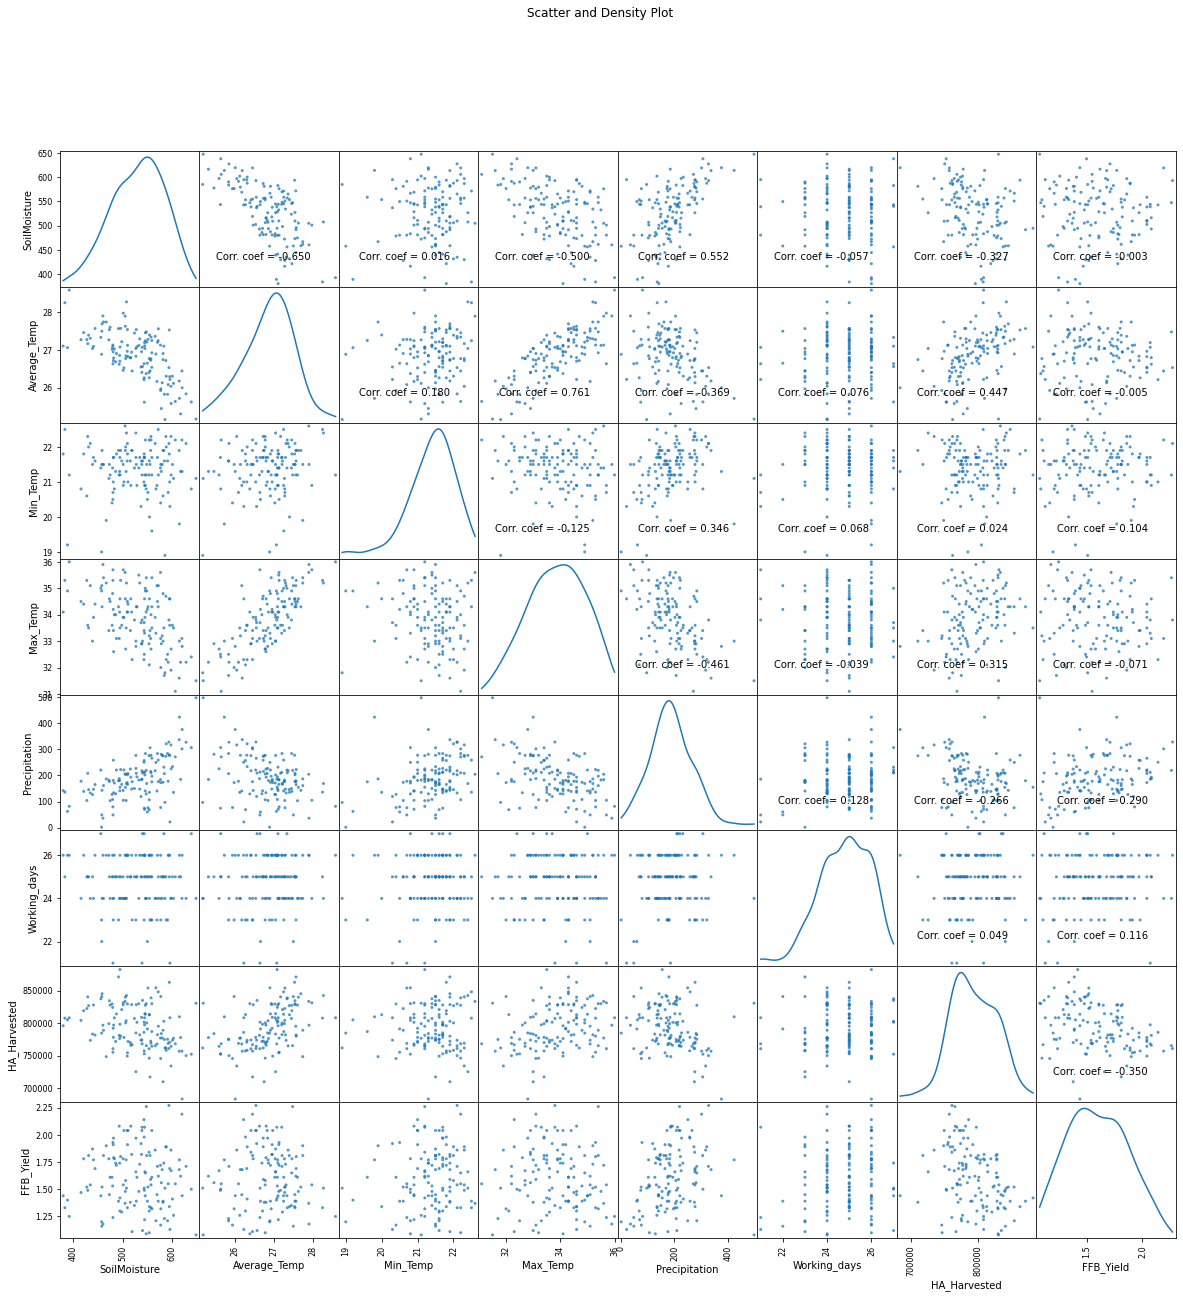

In [38]:
plotScatterMatrix(data, 20, 10)

Interpreting The Heatmap
The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot, let us see what exactly correlation is.

POSITIVE CORRELATION: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.

NEGATIVE CORRELATION: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

So do you think we should use both of them as one of them is redundant. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

- Now from the above heatmap,we can see that the features precipitation and soil moisture are highly correlated. So we may delete one of them if we were to perfrom any machine learning.
- FFB Yield shows strong negative correlation with HA_Harvested and strong positive correlation with min_temp, working days and precipitation. Nice!!

## 8. Time for some feature selection magic
### There are three type of feature selection methods,
- filter methods, which we have tried above
- wrapper methods, which we will try below
- and embedded methods, which usually gets the best features. We shall try these as well here!

In [39]:
data.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [40]:
X = data.drop(['FFB_Yield','Date'],axis=1)  #independent columns
y = data.FFB_Yield    #target column i.e FFB_Yield

In [52]:
from sklearn.preprocessing import LabelEncoder # for assign unique code to each district. since Machin learning algorithm deal with numeric data so we had to do this
from sklearn.metrics import r2_score, mean_squared_error # for metrics
from sklearn.model_selection import cross_val_score # for cross validation 

In [53]:
from sklearn.linear_model import SGDRegressor # for SGD regressor
from sklearn.pipeline import make_pipeline # for pipeline to be used in SGD regressor
from sklearn.preprocessing import StandardScaler # for StandardScaler to be used in SGD regressor

In [54]:

model1 = make_pipeline(StandardScaler(), SGDRegressor(max_iter=10000, tol=1e-3)) # model Detail in link shared
model1.fit(X, y) # passing the input and output to model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(max_iter=10000))])

In [55]:
# cross validation score
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html?highlight=cross_val_score#sklearn.model_selection.cross_val_score
dt_scores = cross_val_score(model1, X, y, cv = 5) # Cv=5 means we trained our model 5 times with different split of test and train. means everytime train dataset will be different.
print("mean cross validation score: {}".format(round(np.mean(dt_scores), 4))) # we computed average of all accuracy score to have a single value which indicates how model performs on unseen data
print("score without cv: {}".format(round(model1.score(X, y),4))) # No CV here. means only model will be trained

mean cross validation score: -0.0089
score without cv: 0.2427


In [56]:
from sklearn.tree import DecisionTreeRegressor # for Decision tree


In [57]:
model2 = DecisionTreeRegressor(random_state=0, criterion="squared_error") # check link
model2.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [58]:
# cross validation score
# explained above
dt_scores = cross_val_score(model2, X, y, cv = 5)
print("mean cross validation score: {}".format(round(np.mean(dt_scores), 4)))
print("score without cv: {}".format(round(model2.score(X, y),4)))

mean cross validation score: -0.7256
score without cv: 1.0


In [ ]:
#Lets try the XGBRessor to fit the model and see what features contributes the most to get higher accuracies.

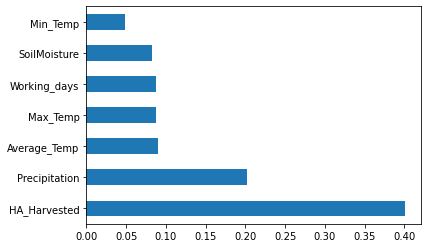

               Importance
HA_Harvested     0.401089
Precipitation    0.202245
Average_Temp     0.089838
Max_Temp         0.088009
Working_days     0.087854
SoilMoisture     0.082905
Min_Temp         0.048060


In [41]:
xgb = XGBRegressor()
xgb.fit(X, y)
imp = pd.DataFrame(xgb.feature_importances_ ,columns = ['Importance'],index = X.columns)
imp = imp.sort_values(['Importance'], ascending = False)

feat_importances = pd.Series(xgb.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

print(imp)

# Analysis 

- Its seems there is a slight change in feature importance, we now have a substitute performing well
- HA_Harvested, Precipitation, Min_Temp are still standing strong. Working_days is out and Average_Temp is in the team.

In [42]:
#k_features=10 (It will get top 10 features best suited for prediction)
#forward=True (Forward feature selection model)
#verbose=2 (It will show details output as shown below.)
#cv=5 (Kfold cross valiation: it will split the training set in 5 set and 4 will be using for training the model and 1 will using as validation)
#n_jobs=-1 (Number of cores it will use for execution.-1 means it will use all the cores of CPU for execution.)
#scoring='r2'(R-squared is a statistical measure of how close the data are to the fitted regression line)
model=sfs(RandomForestRegressor(),k_features=4,forward=True,verbose=2,cv=5,n_jobs=-1,scoring='r2')
model.fit(X,y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    7.0s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    7.0s finished

[2022-09-06 16:15:24] Features: 1/4 -- score: -0.14388873694058407[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    1.2s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    2.5s finished

[2022-09-06 16:15:27] Features: 2/4 -- score: -0.19288770475977654[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished

[2022-09-06 16:15:28] Features: 3/4 -- score: 0.06601960506446165[Parallel(n_jobs=-1)]: Using backen

SequentialFeatureSelector(estimator=RandomForestRegressor(), k_features=4,
                          n_jobs=-1, scoring='r2', verbose=2)

In [43]:
#Get the selected feature index.
model.k_feature_idx_


(0, 4, 5, 6)

In [44]:
#Get the column name for the selected feature.
model.k_feature_names_


('SoilMoisture', 'Precipitation', 'Working_days', 'HA_Harvested')

# Analysis
- Interesting!! , here we see Soil Moisture and Working_days doing well together with Precipitaion and HA_Harvested.

In [45]:
#k_features=4 (It will get top 10 features best suited for prediction)
#forward=False (Backward feature selection model)
#verbose=2 (It will show details output as shown below.)
#cv=5 (Kfold cross valiation: it will split the training set in 5 set and 4 will be using for training the model and 1 will using as validation)
#n_jobs=-1 (Number of cores it will use for execution.-1 means it will use all the cores of CPU for execution.)
#scoring='r2'(R-squared is a statistical measure of how close the data are to the fitted regression line)
backwardModel=sfs(RandomForestRegressor(),k_features=4,forward=False,verbose=2,cv=5,n_jobs=-1,scoring='r2')
#We will convert our training data into numpy array. If we will not convert it, model is not able to read some of the column names. 
backwardModel.fit(np.array(X),y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    1.2s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    1.3s finished

[2022-09-06 16:15:37] Features: 6/4 -- score: 0.25892543829062326[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    1.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    1.1s finished

[2022-09-06 16:15:38] Features: 5/4 -- score: 0.26986918408759675[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished

[2022-09-06 16:15:39] Features: 4/4 -- score: 0.2803066325649889

SequentialFeatureSelector(estimator=RandomForestRegressor(), forward=False,
                          k_features=4, n_jobs=-1, scoring='r2', verbose=2)

In [46]:
#Get the selected feature index.
backwardModel.k_feature_idx_

(0, 2, 4, 6)

In [47]:
#Get the column name for the selected feature.
X.columns[list(backwardModel.k_feature_idx_)]

Index(['SoilMoisture', 'Min_Temp', 'Precipitation', 'HA_Harvested'], dtype='object')

# Analysis 
- Very Interesting!! , Again here we see Soil Moisture and Working_days doing well together with Precipitaion and HA_Harvested.

In [48]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as efs
#min_features=1 (minimum number of feature)
#max_features=5 (maximum number of feature)
#n_jobs=-1 (Number of cores it will use for execution.-1 means it will use all the cores of CPU for execution.)
#scoring='r2'(R-squared is a statistical measure of how close the data are to the fitted regression line)
emodel=efs(RandomForestRegressor(),min_features=1,max_features=7,scoring='r2',n_jobs=-1)
#Lets take only 10 features which we got from backward feature selection.
miniData=X[X.columns]

emodel.fit(np.array(miniData),y)
#If you see below the model creates 637 feature combinations from 10 features.Thats why its computationally very expensive.

Features: 127/127

ExhaustiveFeatureSelector(estimator=RandomForestRegressor(), max_features=7,
                          n_jobs=-1, scoring='r2')

In [49]:
#Get the selected feature index.
emodel.best_idx_

(0, 2, 4, 6)

In [50]:
#Get the column name for the selected feature.
miniData.columns[list(emodel.best_idx_)]

Index(['SoilMoisture', 'Min_Temp', 'Precipitation', 'HA_Harvested'], dtype='object')

# Analysis
- Very Very Interesting!! Lets accept it now, Soil Moisture and Working_days are part of the best feature team together with Precipitaion, Min_Temp and HA_Harvested.